Frame:1

/Users/yoshidamakoto/opt/miniconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/yoshidamakoto/opt/miniconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/yoshidamakoto/opt/miniconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Addin

Frame:23

KeyboardInterrupt: 

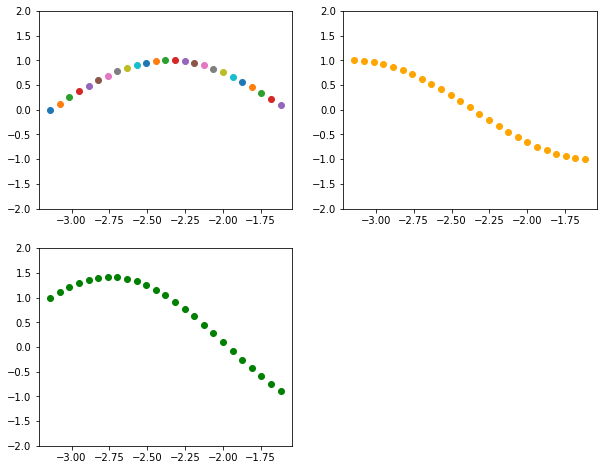

In [34]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import io
import cv2

t = np.linspace(-np.pi, np.pi, 100)

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2,2)

#fourcc = cv2.VideoWriter_fourcc('y','u','v','2')
#fourcc = cv2.VideoWriter_fourcc('a','v','c','1')
fourcc = cv2.VideoWriter_fourcc(*'XVID')

video = None
for i, t0 in enumerate(t):
    buf = io.BytesIO()

    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[1,0])
    
    x1 = np.sin(2*t0)
    x2 = np.cos(2*t0)
    x3 = x1 + x2
    
    ax1.scatter(t0, x1)
    ax2.scatter(t0, x2, color="orange")
    ax3.scatter(t0, x3, color="green")
    
    ax1.set_ylim([-2,2])
    ax2.set_ylim([-2,2]) 
    ax3.set_ylim([-2,2]) 
    
    plt.savefig(buf, format="png")
    #plt.savefig("{}.png".format(i), format="png")

    enc = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    dst = cv2.imdecode(enc, 1)
    dst = dst[:,:,::-1]
    
    print("\rFrame:{}".format(i),end="")
    #cv2.imwrite("{}.png".format(i),dst)
    if(i==0):
        video = cv2.VideoWriter('gridplot_to_movie.mp4', fourcc, 30.0, (dst.shape[1], dst.shape[0]))
        #print("Create video obj:",video)
        
    video.write(dst)
    
    #plt.clf()

video.release()   
    
